# 场景：超售多少收益最大
+ 需要一些业务假设：买了票的，有多大概率会坐飞机；
+ 一张票能赚多少钱；
+ 如果要补偿客户，一个客户要补偿多少；
+ 计算：超售的票数

In [ ]:
# using PyPlot

using StatsPlots # no need for `using Plots` as that is reexported here
gr(size=(600,500))

In [22]:
# 买票后会做飞机的概率
probability_show = 0.935

function show_up(probability_show::Float64)
    if rand() <= probability_show
        return true # passenger showed up
    else
        return false # passenger didn't show up
    end
end

# 在给定概率 probability_show 下，卖出 nb_tickets_sold 张票，实际来坐飞机的人数
function simulate_flight(nb_tickets_sold::Int64, probability_show::Float64)
    n = 0 # number of folks who bought tix that will show up
    for i = 1:nb_tickets_sold
        if show_up(probability_show)
            n = n + 1
        end
    end
    return n
end


function simulate_net_revenue(nb_tickets_sold::Int64, nb_seats::Int, 
    probability_show::Float64, revenue_per_seat::Float64, voucher_cost::Float64)
    # how many ticket purchasers actually showed up?
    nb_shows = simulate_flight(nb_tickets_sold, probability_show)
    # no one bumped from flight if less or equal folks show up than for the number of seats we have
    if nb_shows <= nb_seats
        return revenue_per_seat * nb_shows
    # if more customers show up than seats we hv, must pay out vouchers
    else
        vouchers_out = nb_shows - nb_seats
        return nb_seats * revenue_per_seat - voucher_cost * vouchers_out
    end
end

simulate_net_revenue (generic function with 1 method)

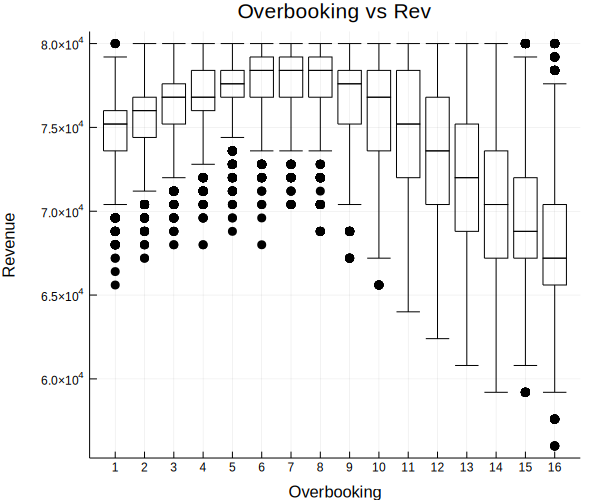

In [74]:
# 总座位数
nb_seats = 100

# 一张票的价格，以及补偿给客户的价格
revenue_per_seat = 800.0 
voucher_cost = revenue_per_seat * 2.0 

# 模拟 1w 航班，最多超售 15 张
nb_flights = 10000
max_overbooking = 15

# revenue[i, k] is net revenue received from flight i with k-1 tickets over capacity sold
# 不是只模拟 1w 次，而是，超售1张的，模拟1w次，超售2张的，模拟1w次，....
revenue = zeros(nb_flights, max_overbooking + 1)

for tix_overbooked = 0:max_overbooking
    nb_tickets_sold = nb_seats + tix_overbooked
    
    # simulate nb_flights flights
    for f = 1:nb_flights 
        revenue[f, tix_overbooked + 1] =
            simulate_net_revenue(nb_tickets_sold, nb_seats, 
                probability_show, revenue_per_seat, voucher_cost)
    end
end


b = ["$i" for i in 0:max_overbooking]

boxplot(revenue, title="Overbooking vs Rev", 
    labels=b, legend=false, 
    color=false, 
    xlabel="Overbooking", ylabel="Revenue", 
    xticks=0:1:16)


## 结论
1. 不超卖：利润少于超卖。
2. 超卖太多，利润降低。
3. 在上述实验设置下，超卖 6-8 张票利润达到最大。